In [59]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as sts
from tabulate import tabulate
from collections import Counter
%matplotlib inline


In [60]:
n = 1000 #задается вручную
a = 1.
b = 5.
y0 = 1.

In [61]:
sample_X = []
sample_Y = []
uniform_rv = sts.uniform()
sample_xi = uniform_rv.rvs(size=n)
for i in range(n):
    x = sample_xi[i] * (b - a) + a
    sample_X.append(x)
    y = np.log(x)
    sample_Y.append(y)  
order_X = sorted(sample_X)    
order_Y = sorted(sample_Y)    

In [62]:
print(sample_Y)

[0.49286840523055, 0.8110873909302788, 1.4006775266723321, 0.555228254991113, 1.40312467353432, 1.3043553531497667, 0.4028786276461716, 1.3568690946321995, 0.47967818208792373, 1.2119756722399921, 1.2263641902093365, 0.31349890605240943, 1.217533984374261, 0.2527076813435447, 0.25214533231172687, 1.1879168552694555, 1.1482382029809777, 1.5557700471768106, 1.1886620357475026, 1.4732231554044313, 1.0141563187728377, 0.6394704438149357, 0.9347683069122822, 1.0914612138049886, 1.5019616703235505, 0.3311178847225993, 1.1245121407451308, 1.598843650600851, 0.13361785825185746, 1.4234640959045237, 0.38738214605007665, 1.2869346408571603, 0.8373995190865872, 1.5913065021429538, 1.2112548428921233, 0.9590774807707128, 0.943408216429663, 1.244009178992222, 0.7261722396634053, 1.520786576631083, 1.0760463211293987, 0.8520396281478605, 1.165998535112512, 1.5634500197595183, 0.5023510297084898, 1.5163547915117512, 0.7703882131428293, 0.892989954546213, 0.9488492242566314, 0.6375367908085264, 0.1982

In [63]:
ordered_Y = sorted(sample_Y)
d = {"Значение": ordered_Y}
df = pd.DataFrame(data=d)
print("Вариационный ряд:")
df.T

Вариационный ряд:


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Значение,0.009213,0.012108,0.02267,0.04118,0.048405,0.049499,0.05081,0.065297,0.066066,0.068639,...,1.603749,1.604221,1.604558,1.605461,1.606544,1.606899,1.607231,1.607658,1.608048,1.608571


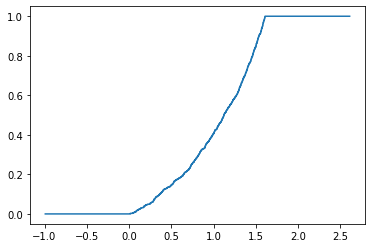

In [64]:
plt.step([min(order_Y) - 1] + [y for y in order_Y] + [max(order_Y) + 1], [0] + [index/ len(order_Y) for index in range(len(order_Y))] + [1])    

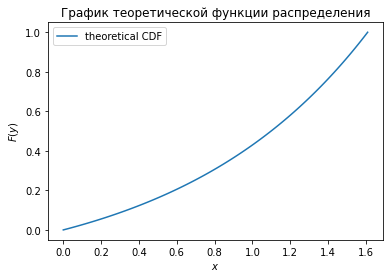

In [65]:
xx = np.linspace(np.log(1), np.log(5), 100)
yy = (np.exp(xx) - 1) / 4
py = np.exp(xx) / 4
plt.title("График теоретической функции распределения")
plt.plot(xx, yy, label='theoretical CDF')
plt.ylabel('$F(y)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

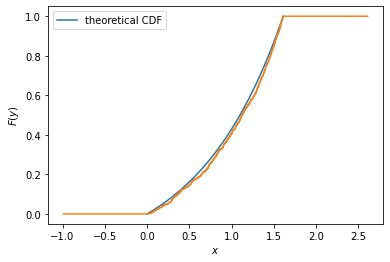

In [66]:
plt.plot(xx, yy, label='theoretical CDF')
plt.step([min(order_Y) - 1] + [y for y in order_Y] + [max(order_Y) + 1], [0] + [index/ len(order_Y) for index in range(len(order_Y))] + [1])    
plt.ylabel('$F(y)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

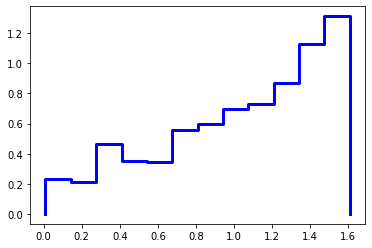

In [67]:
M = int(np.sqrt(n)) if n <= 100 else int(4 * np.log10(n))
def generate_data_for_f_via_intervals(samps, m):
    n = len(samps)
    xdots = [min(samps)] + [min(samps) + (max(samps)-min(samps)) * (i+1)/m for i in range(m)]
    ydots = [0]
    ind = 0
    for i in range(m):
        cnt = 0
        while ind < n and samps[ind] <= xdots[i+1]:
            ind += 1
            cnt += 1
        try:
            ydots += [cnt/n * m/(max(samps)-min(samps))]
        except ZeroDivisionError:
            ydots += [np.inf]
    xdots += [max(samps)]
    ydots += [0]
    return xdots, ydots
init_data_intervals = generate_data_for_f_via_intervals(order_Y, M)
intervalhist, = plt.step(*init_data_intervals, where='pre', linewidth=3, color='blue' )

Text(0, 0.5, 'F(Y)')

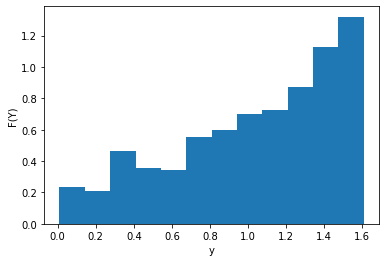

In [68]:
M = int(np.sqrt(n)) if n <= 100 else int(4 * np.log10(n))
nums, probas, _ = plt.hist(sample_Y, bins=M, density=True) # строим гистограмму равноинтервальным методом
plt.xlabel("y")
plt.ylabel("F(Y)")

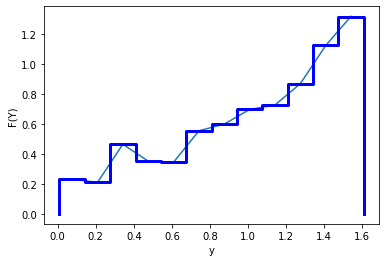

In [69]:
plt.plot(probas[:-1] + (probas[1] - probas[0]) / 2, nums) # строим полигон распределения
intervalhist, = plt.step(*init_data_intervals, where='pre', linewidth=3, color='blue' )
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

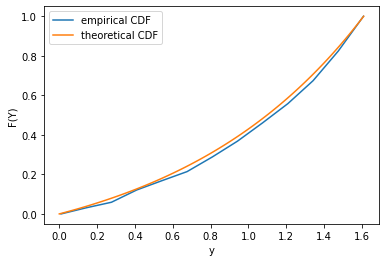

,0,1,2,3,4,5,6,7,8,9,10,11,12
Y,0.009213,0.142493,0.275773,0.409053,0.542333,0.675612,0.808892,0.942172,1.075452,1.208732,1.342011,1.475291,1.608571
F(Y),0.000000,0.031000,0.059000,0.121000,0.168000,0.214000,0.288000,0.368000,0.461000,0.558000,0.674000,0.824000,1.000000


In [70]:
# построим эмпирическую функцию распределения по сгруппированным данным

normed_nums = nums * (probas[1] - probas[0])

#xx = np.linspace(np.log(1), np.log(5), 100)
#yy = (np.exp(xx) - 1) / 4
ecdf2 = []
sum = 0.
for i in normed_nums:
    ecdf2.append(sum)
    sum += i
ecdf2.append(1)

plt.plot(probas, ecdf2, label='empirical CDF')
plt.plot(xx, yy, label='theoretical CDF')
#plt.hist(sample_Y, bins=M, density=True, label="histogram", alpha=0.4)
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

table = pd.DataFrame(data={"Y": probas, "F(Y)": ecdf2})
table.T


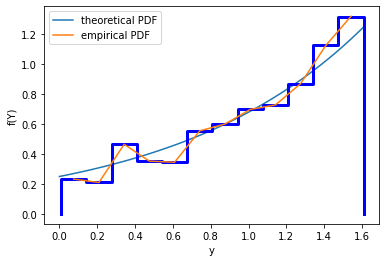

In [71]:
plt.plot(xx, py, label='theoretical PDF')
intervalhist, = plt.step(*init_data_intervals, where='pre', linewidth=3, color='blue' )
plt.plot(probas[:-1] + (probas[1] - probas[0]) / 2, nums, label='empirical PDF')

plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

In [72]:
m = n // M

def hist_eq_prob(sample):
    sample.sort()
    A = [sample[0]]
    B = []
    for i in range(1, M):
        A.append(sample[i * m])
        B.append(sample[i * m])
    B.append(sample[-1])
    d = []
    for i in range(len(A)):
        d.append(B[i] - A[i])
    y = []
    x = []
    s = A[0]
 
    for i in d:
        y.append(1. /(M * i))
        x.append(s)
        s += i
        
    return (x, y)

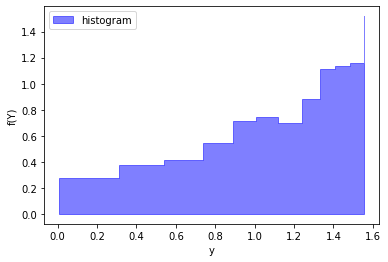

,0,1,2,3,4,5,6,7,8,9,10,11
x0,0.009213,0.313731,0.537729,0.738071,0.891367,1.008155,1.119940,1.239502,1.333629,1.408455,1.481615,1.553662
normed m,0.273657,0.372028,0.415954,0.543613,0.713541,0.745484,0.696984,0.885329,1.113694,1.139056,1.156652,1.517672


In [73]:
x, y = hist_eq_prob(sample_Y)
plt.fill_between(x, y1=y, y2=[0]*len(y), color='b', step='post', alpha=0.5, label="histogram")
nx = []
for i in range(len(x) - 1):
    nx.append((x[i] + x[i+1]) / 2)
#plt.plot(nx, y[:-1], color='r', label='polygon')
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

table2 = pd.DataFrame(data={"x0" : x, "normed m": y})
table2.T

In [74]:
# построим эмпирическую функцию распределения по сгруппированным данным

ecdf3 = []
sum = 0.
for i in range(len(y)):
    ecdf3.append(sum)
    sum += 1 / M

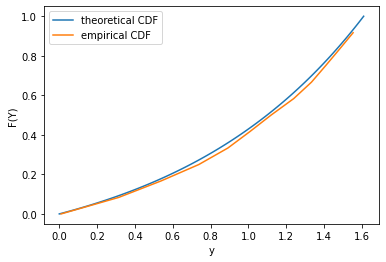

In [75]:
xx = np.linspace(np.log(1), np.log(5), 100)
yy = (np.exp(xx) - 1) / 4
#plt.fill_between(x, y1=y, y2=[0]*len(y), color='b', step='post', alpha=0.5, label="histogram")
plt.plot(xx, yy, label='theoretical CDF')
plt.plot(x, ecdf3, label='empirical CDF')
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

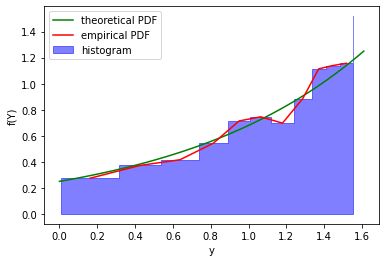

In [76]:
plt.plot(xx, py, label='theoretical PDF', c='g')
plt.fill_between(x, y1=y, y2=[0]*len(y), color='b', step='post', alpha=0.5, label="histogram")
plt.plot(nx, y[:-1], color='r', label='empirical PDF')
#plt.plot(x, ecdf3, label='empirical CDF')
plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

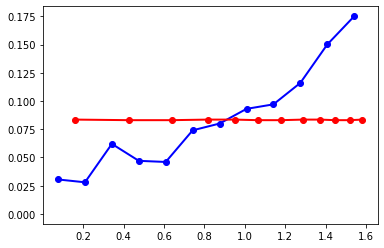

In [79]:
init_n = 66
init_m = 10


def generate_data_for_f_via_intervals(samps, m):
    n = len(samps)
    xdots = [min(samps)] + [min(samps) + (max(samps)-min(samps)) * (i+1)/m for i in range(m)]
    ydots = [0]
    ind = 0
    for i in range(m):
        cnt = 0
        while ind < n and samps[ind] <= xdots[i+1]:
            ind += 1
            cnt += 1
        try:
            ydots += [cnt/n * m/(max(samps)-min(samps))]
        except ZeroDivisionError:
            ydots += [np.inf]
    xdots += [max(samps)]
    ydots += [0]
    return xdots, ydots



def extract_polygon(samps, histogram_xdots, histogram_ydots):
    xhist, yhist = histogram_xdots[:-1], histogram_ydots[:-1]
    xdots, ydots = [], []
    for i in range(len(xhist)-1):
        dots_count = 0
        for x in samps:
            if xhist[i] < x < xhist[i+1]:
                dots_count += 1
            if xhist[i] == x or xhist[i+1] == x:
                dots_count += 1/2
        ydots += [dots_count / (len(samps)-1)]
        xdots += [(xhist[i] + xhist[i+1]) / 2]
    return xdots, ydots
        
fig, ax = plt.subplots()
        
init_data = ordered_Y    
    
data = init_data    
    
global data

init_n = 86
init_m = 9

m = init_m
m = M
n = init_n
n = 100
        
xdots, ydots = generate_data_for_f_via_intervals(data, m)
xpoly, ypoly = extract_polygon(data, xdots, ydots)
plt.plot(xpoly, ypoly, linewidth=2, color='blue', marker='o')
        
xdots, ydots = generate_data_for_f_via_probabilities(data, m)
xpoly, ypoly = extract_polygon(data, xdots, ydots)
plt.plot(xpoly, ypoly, linewidth=2, color='red', marker='o')
        
plt.plot(xpoly[0:1], [0], 'o', markersize=0)     